# 선형회귀 - 자동차 연비 예측 project

- "데이터 랭글링(Data Wrangling)" 은 데이터 클리닝, 변형, 병합 및 준비 과정을 의미합니다. 이는 데이터를 분석하기 전에 정제하는 과정입니다. 이 과정에서는 이상치, 누락된 값, 일치하지 않는 형식 등을 처리하며, 원하는 형식으로 데이터를 정리합니다.

## 디젤 자동차의 연비 (L/100k) 예측

다음 링크에서 "자동차 데이터 세트"를 찾을 수 있습니다.: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data.

1. symboling: -3, -2, -1, 0, 1, 2, 3.(자동차가 가격이 나타내는 것보다 더 위험한 정도)
2. normalized-losses: continuous from 65 to 256. (피보험차량 연도당 상대평균손해배상금)
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo. (흡기 방식)
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.(축간 거리)
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.(차량 중량)
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.(실린더 직경)
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

df = pd.read_csv(filename, names = headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Data Wrangling & Feature Engineering

**실습의 편이성을 위해 일부 feature 를 임의로 삭제**

In [3]:
df.drop(["make", "body-style", "drive-wheels", "engine-location", 
         "engine-type", "num-of-cylinders", "fuel-system"], axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   fuel-type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num-of-doors       205 non-null    object 
 5   wheel-base         205 non-null    float64
 6   length             205 non-null    float64
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   curb-weight        205 non-null    int64  
 10  engine-size        205 non-null    int64  
 11  bore               205 non-null    object 
 12  stroke             205 non-null    object 
 13  compression-ratio  205 non-null    float64
 14  horsepower         205 non-null    object 
 15  peak-rpm           205 non-null    object 
 16  city-mpg           205 non

- 물음표는 결측치로 표시되어 있음

**누락된 데이터(결측치) 처리**

결측치 처리 단계:
1. 누락된 데이터 식별
2. 누락된 데이터 처리
3. 데이터 형식 수정

### Identify and handle missing values

- "?" 를 NaN 으로 변환

 <pre>.replace("?", np.nan, inplace = True) </pre>

In [5]:
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,gas,std,two,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,gas,std,two,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,gas,std,two,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,gas,std,four,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,gas,std,four,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


### Missing Data 평가

누락된 값은 Python의 기본값으로 변환됩니다. 우리는 이러한 누락된 값을 식별하기 위해 Python의 내장 함수를 사용합니다.

1.  **.isnull()**
2.  **.notnull()**

In [6]:
missing_data = df.isnull()
missing_data.head(3)

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
missing_data.sum()

symboling             0
normalized-losses    41
fuel-type             0
aspiration            0
num-of-doors          2
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
missing_data.sum().index[(missing_data.sum() != 0).values]

Index(['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower',
       'peak-rpm', 'price'],
      dtype='object')

### missing data 처리
** 누락 된 데이터를 처리하는 방법 : **
   
 1. 데이터 삭제
         a. 전체 행을 삭제  
         b. 전체 열을 삭제  
     
     
 2. 데이터 교체  
         a. 평균으로 대체  
         b. 빈도수가 많은 것으로 대체  
         c. 기타 함수를 이용하여 교체  
     

- 평균으로 교체할 columns
    
    "normalized-losses", "stroke", "bore", "horsepower", "peak-rpm"

    
- 빈도수가 많은 것으로 대체할 column

    "num-of-doors": sedan의 84% 가 4 도어이므로 "four"로 대체
    
    
- 전체 행을 삭제

    "price": 평균으로 대체할 수도 있으나 간단히 전체 행 삭제.    

### 평균으로 대체할 column
- "normalized-losses", "bore", "stroke", "horsepower", "peak-rpm"은 "NaN" 을 열의 평균 값으로 바꿉니다.

In [10]:
avg_1 = df["normalized-losses"].astype("float").mean(axis = 0)
avg_2 = df['bore'].astype('float').mean(axis=0)
avg_3 = df['stroke'].astype('float').mean(axis=0)
avg_4 = df['horsepower'].astype('float').mean(axis=0)
avg_5 = df['peak-rpm'].astype('float').mean(axis=0)

df["normalized-losses"].replace(np.nan, avg_1, inplace = True)
df['bore'].replace(np.nan, avg_2, inplace= True)
df['stroke'].replace(np.nan, avg_3, inplace=True)
df['horsepower'].replace(np.nan, avg_4, inplace= True)
df['peak-rpm'].replace(np.nan, avg_5, inplace= True)                     

### 빈도수가 많은 것으로 대체할 column

- "num-of-doors"는 최빈값으로 대체

In [11]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [12]:
#가장 빈번한 값으로 대체
df["num-of-doors"].replace(np.nan, "four", inplace = True)

### 전체 행을 삭제할 column

- "price"는 missing value 가 있는 row 단순 삭제

In [13]:
# "가격" 열에 NaN이 있는 전체 행을 삭제
df.dropna(subset=["price"], axis=0, inplace = True)

# 행을 삭제했기 때문에 인덱스 재설정
df.reset_index(drop = True, inplace = True)

In [14]:
df.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,gas,std,two,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,gas,std,two,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,gas,std,two,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,gas,std,four,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,gas,std,four,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


## data format 교정

- 데이터 정리의 마지막 단계는 모든 데이터가 올바른 형식 (int, float, text 또는 기타)인지 확인하는 것입니다.

**`.dtype()`** - data type check  


**`.astype()`**- data type 변경 

In [15]:
df.dtypes

symboling              int64
normalized-losses     object
fuel-type             object
aspiration            object
num-of-doors          object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-size            int64
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

### 데이터 유형을 적절한 형식으로 변환:

- 숫자 변수는 'float'또는 'int'유형을 가져야 하며 카테고리와 같은 문자열이 있는 변수는 'object'유형을 가져야 합니다.


- 숫자값 feature는 `astype()` 메소드를 사용하여 'float'또는 'int' type 으로 변환.  

In [18]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")

df["normalized-losses"] = df["normalized-losses"].astype("int")

df["price"] = df["price"].astype("float")

df["peak-rpm"] = df["peak-rpm"].astype("float")

In [19]:
df.dtypes

symboling              int64
normalized-losses      int32
fuel-type             object
aspiration            object
num-of-doors          object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-size            int64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## Data Standardization (데이터 표준화)


- 표준화는 의미있는 비교를 할 수 있도록 데이터를 공통 형식으로 변환하는 프로세스

**Ex)** mpg 를 L/100km로 변환:

데이터 세트에서 연료 소비 열 "city-mpg" 및 "highway-mpg"는 mpg(갤런 당 마일 단위로 표시됩니다. L/100km 기준으로 연료 소비를 허용하는 국가에서 애플리케이션을 개발 중이라고 가정하면, mpg를 L/100km로 변환해야 합니다.

단위 변환 공식은 다음과 같습니다.  
L/100km = 235 / mpg 

In [20]:
df['city-L/100km'] = 235/df["city-mpg"]
df["highway-mpg"] = 235/df["highway-mpg"]

df.rename(columns={"highway-mpg":'highway-L/100km'}, inplace=True)

df.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,gas,std,two,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,gas,std,two,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,gas,std,two,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,gas,std,four,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,gas,std,four,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


#  Binning


- binning은 그룹화 된 분석을 위해 연속 숫자 변수를 이산 범주 형 `bin`으로 변환하는 프로세스입니다.

**Example:**   
"horsepower" 48 to 288 사이의 변수이고 57 개의 unique value 를 가지고 있는데 이 것을 3 개의 type 으로 구분

In [21]:
df["horsepower"] = df["horsepower"].astype(float)

- `pd.cut` 함수를 이용하여 bandwidth가 동일한 4 개의 bin으로 구분. "cut" 함수에 맨 오른쪽 값이 포함되기 때문에 숫자는 4개 지정.

In [22]:
binwidth = (max(df["horsepower"])-min(df["horsepower"]))/4
binwidth  

53.5

In [23]:
bins = np.arange(min(df["horsepower"]), max(df["horsepower"]), binwidth)
bins

array([ 48. , 101.5, 155. , 208.5])

In [24]:
group_names = ['Low', 'Medium', 'High']

df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names)

df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111.0,Medium
1,111.0,Medium
2,154.0,Medium
3,102.0,Medium
4,115.0,Medium
5,110.0,Medium
6,110.0,Medium
7,110.0,Medium
8,140.0,Medium
9,101.0,Low


## Bins 분포 시각화

- `horsepower` 특성을 bins=3 으로 historgram 작성 

Text(0.5, 1.0, 'horsepower bins')

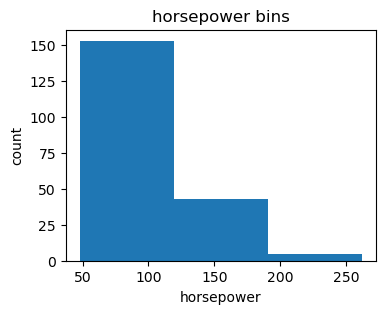

In [27]:
plt.figure(figsize=(4, 3))
plt.hist(df["horsepower"], bins = 3)

plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

## 범주형 변수 처리

### Indicator variable (or dummy variable) 

 - 범주에 레이블을 지정하는 데 사용되는 숫자 변수.

In [37]:
df.head(2)

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned
0,3,122,gas,std,two,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,8.703704,13495.0,11.190476,Medium
1,3,122,gas,std,two,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,8.703704,16500.0,11.190476,Medium


범주형 변수 파악

In [38]:
df.describe(include=['object', 'category'])

,fuel-type,aspiration,num-of-doors,horsepower-binned
count,201,201,201,199
unique,2,2,2,3
top,gas,std,four,Low
freq,181,165,115,114


각 범주형 변수값의 분포 파악

In [39]:
df['fuel-type'].value_counts()

gas       181
diesel     20
Name: fuel-type, dtype: int64

In [40]:
df['num-of-doors'].value_counts()

four    115
two      86
Name: num-of-doors, dtype: int64

In [41]:
df['aspiration'].value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

In [42]:
df['horsepower-binned'].value_counts()

Low       114
Medium     62
High       23
Name: horsepower-binned, dtype: int64

pd.get_dummies() 함수를 사용하여 dummy 변수 생성

In [53]:
pd.get_dummies(df[["fuel-type", 'num-of-doors', 'aspiration', 'horsepower-binned']], drop_first=True)

,fuel-type_gas,num-of-doors_two,aspiration_turbo,horsepower-binned_Medium,horsepower-binned_High
0,1,1,0,1,0
1,1,1,0,1,0
2,1,1,0,1,0
3,1,0,0,1,0
4,1,0,0,1,0
5,1,1,0,1,0
6,1,0,0,1,0
7,1,0,0,1,0
8,1,0,1,1,0
9,1,1,0,0,0


In [54]:
clean_df = df.copy()

In [55]:
pd.options.display.max_columns = None

clean_df = pd.get_dummies(clean_df, columns=["fuel-type", 'num-of-doors', 'aspiration', 'horsepower-binned'], drop_first=True)
clean_df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type_gas,num-of-doors_two,aspiration_turbo,horsepower-binned_Medium,horsepower-binned_High
0,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,8.703704,13495.0,11.190476,1,1,0,1,0
1,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,8.703704,16500.0,11.190476,1,1,0,1,0
2,1,122,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,9.038462,16500.0,12.368421,1,1,0,1,0
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,7.833333,13950.0,9.791667,1,0,0,1,0
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,10.681818,17450.0,13.055556,1,0,0,1,0


## Data Normalization (데이터 정규화)

- 정규화는 여러 변수의 값을 유사한 범위로 변환하는 프로세스입니다. 일반적인 정규화에는 simple scaling, 변수 평균이 0 이고, 변수 분산이 1이 되도록 하는 Standard Scaling, 변수 값이 0에서 1 범위가 되도록 하는 MinMax Scaling 이 포함됩니다.

**Example**
<div>"length", "width" and "height" 를 0 과 1 사이로 normalize </div>

In [56]:
# Min-Max scaling
clean_df = (clean_df - clean_df.min()) / (clean_df.max() - clean_df.min())

In [57]:
y = clean_df.pop('city-mpg').values
X = clean_df.values
X.shape, y.shape

((201, 21), (201,))

## Machine Learning을 이용한 Linear Regression - 연비 예측

- train/test split

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 21), (41, 21), (160,), (41,))

In [59]:
# model train
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [60]:
# prediction 
y_pred = lr.predict(X_test)

- 예측 line 시각화

Text(0.5, 1.0, 'Linear Regresson Plot of MPG')

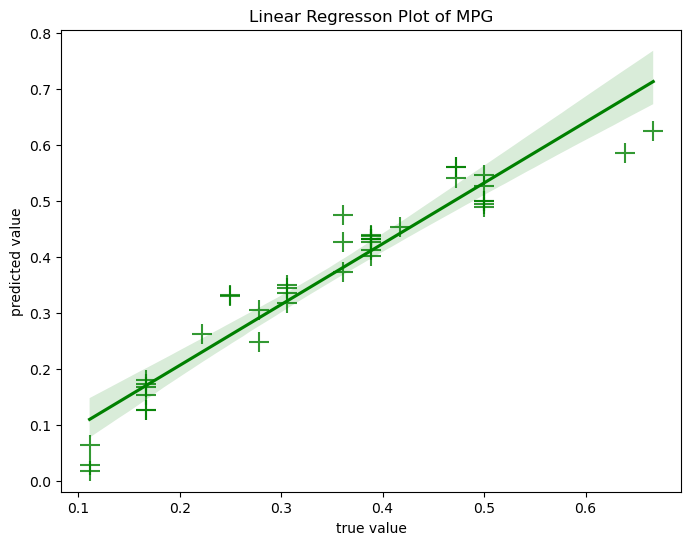

In [61]:
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.regplot(x=y_test, y=y_pred, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='true value', ylabel='predicted value') # add x- and y-labels
ax.set_title('Linear Regresson Plot of MPG') # add title